In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from cycler import cycler

# Prepare data

In [17]:
# Prepare data: COVID-tweets
df_covid_tweets_annotation = pd.read_csv('../dataset_description/annotation/covid_tweets_annotation.csv')
df_covid_tweets_annotation  = df_covid_tweets_annotation.copy()
df_covid_tweets_annotation  = df_covid_tweets_annotation .drop(['tweet_id', 'tweet_content', 'annotation_qualifier'], axis='columns')

df_popular_covid_tweets = pd.read_json('../dataset_description/most_popular_covid_tweets.json')
df_popular_covid_tweets = df_popular_covid_tweets.drop(['screen_name', 'p_user_id', 'tweet'], axis='columns')

df_covid = df_popular_covid_tweets.join(df_covid_tweets_annotation)

df_covid_sentiment = df_covid.copy()
df_covid_sentiment = df_covid_sentiment.drop(['annotation_emotion'], axis='columns')
df_covid_sentiment = df_covid_sentiment.rename(columns={'annotation_sentiment': 'sentiment'})

df_covid_emotion = df_covid.copy()
df_covid_emotion = df_covid_emotion.drop(['annotation_sentiment'], axis='columns')
df_covid_emotion = df_covid_emotion.rename(columns={'annotation_emotion': 'emotion'})

# Prepare data: non-COVID-tweets
df_non_covid_tweets_annotation = pd.read_csv('../dataset_description/annotation/non_covid_tweets_annotation.csv')
df_non_covid_tweets_annotation  = df_non_covid_tweets_annotation.copy()
df_non_covid_tweets_annotation  = df_non_covid_tweets_annotation.drop(['tweet_id', 'tweet_content'], axis='columns')

df_popular_non_covid_tweets = pd.read_json('../dataset_description/most_popular_non_covid_tweets.json')
df_popular_non_covid_tweets = df_popular_non_covid_tweets.drop(['screen_name', 'p_user_id', 'tweet'], axis='columns')

df_non_covid = df_popular_non_covid_tweets.join(df_non_covid_tweets_annotation)

df_non_covid_sentiment = df_non_covid.copy()
df_non_covid_sentiment = df_non_covid_sentiment.drop(['annotation_emotion'], axis='columns')
df_non_covid_sentiment = df_non_covid_sentiment.rename(columns={'annotation_sentiment': 'sentiment'})

df_non_covid_emotion = df_non_covid.copy()
df_non_covid_emotion = df_non_covid_emotion.drop(['annotation_sentiment'], axis='columns')
df_non_covid_emotion = df_non_covid_emotion.rename(columns={'annotation_emotion': 'emotion'})

# Evaluation of the qualitative sentiment analysis: COVID-tweets

In [18]:
df_sentiment_overview = df_covid_sentiment.copy()
df_sentiment_overview = df_sentiment_overview.groupby('sentiment').count()
df_sentiment_overview = df_sentiment_overview.drop(['name'], axis='columns')
df_sentiment_overview = df_sentiment_overview.rename(columns={'party': 'count'})
print("Number of COVID-tweets by category (positive > 0, neutral = 0, negative < 0)")
print(df_sentiment_overview)

df_sentiment_per_party = df_covid_sentiment.copy()
df_sentiment_per_party = df_sentiment_per_party.groupby(['sentiment', 'party']).count()
df_sentiment_per_party = df_sentiment_per_party.rename(columns={'name': 'count'})
print("Number of COVID-tweets by category (positive > 0, neutral = 0, negative < 0) and party")
print(df_sentiment_per_party)

Number of COVID-tweets by category (positive > 0, neutral = 0, negative < 0)
           count
sentiment       
negative      77
neutral       20
positive      23
Number of COVID-tweets by category (positive > 0, neutral = 0, negative < 0) and party
                                 count
sentiment party                       
negative  AfD                       14
          Bündnis 90/Die Grünen      8
          CDU                        6
          CSU                        4
          Die Linke                 13
          FDP                        5
          Fraktionslos              15
          SPD                       12
neutral   Bündnis 90/Die Grünen      1
          CDU                        6
          CSU                        7
          Die Linke                  1
          FDP                        5
positive  AfD                        1
          Bündnis 90/Die Grünen      6
          CDU                        3
          CSU                        4
          

# # Evaluation of the qualitative emotion analysis: COVID-tweets

Number of COVID-tweets by emotion
              count
emotion            
anger            34
anticipation     15
disgust          28
fear             11
joy               4
sadness           8
surprise          2
trust            18
Number of COVID-tweets by emotion and party
                                    count
emotion      party                       
anger        AfD                        6
             Bündnis 90/Die Grünen      3
             CDU                        4
             Die Linke                  5
             FDP                        1
             Fraktionslos              13
             SPD                        2
anticipation AfD                        1
             Bündnis 90/Die Grünen      3
             CDU                        3
             CSU                        2
             Die Linke                  1
             FDP                        4
             SPD                        1
disgust      AfD                        8
        

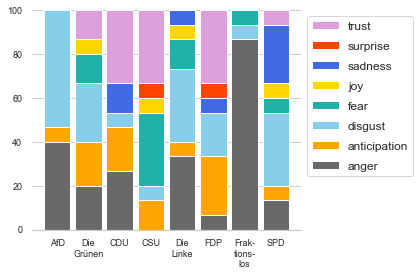

In [19]:
df_emotion_overview = df_covid_emotion.copy()
df_emotion_overview = df_emotion_overview.groupby('emotion').count()
df_emotion_overview = df_emotion_overview.drop(['name'], axis='columns')
df_emotion_overview = df_emotion_overview.rename(columns={'party': 'count'})
print("Number of COVID-tweets by emotion")
print(df_emotion_overview)

df_emotion_per_party = df_covid_emotion.copy()
df_emotion_per_party = df_emotion_per_party.groupby(['emotion', 'party']).count()
df_emotion_per_party = df_emotion_per_party.rename(columns={'name': 'count'})
print("Number of COVID-tweets by emotion and party")
print(df_emotion_per_party)

# Stacked bar chart
fig, ax = plt.subplots(tight_layout=True)
r = [0,1,2,3,4,5,6,7]

df_covid_emotion_stacked = df_covid_emotion.copy()
stacked = (df_covid_emotion_stacked['emotion'].value_counts(sort= True, ascending=False)).index.to_list()
df = df_covid_emotion_stacked.groupby(['party'])['emotion'].value_counts(sort=True, ascending=False).unstack().fillna(0)

# From raw value to percentage
totals = [i+j+k+l+m+n+o+p for i,j,k,l,m,n,o,p in zip(df['anger'], df['anticipation'], df['disgust'], df['fear'], df['joy'], df['sadness'], df['surprise'], df['trust'])]
anger = [i / j * 100 for i,j in zip(df['anger'], totals)]
anticipation = [i / j * 100 for i,j in zip(df['anticipation'], totals)]
disgust = [i / j * 100 for i,j in zip(df['disgust'], totals)]
fear = [i / j * 100 for i,j in zip(df['fear'], totals)]
joy = [i / j * 100 for i,j in zip(df['joy'], totals)]
sadness = [i / j * 100 for i,j in zip(df['sadness'], totals)]
surprise = [i / j * 100 for i,j in zip(df['surprise'], totals)]
trust = [i / j * 100 for i,j in zip(df['trust'], totals)]

# plot
barWidth = 0.85
names = ('AfD','Die\nGrünen','CDU','CSU','Die\nLinke', 'FDP', 'Frak-\ntions-\nlos', 'SPD')

plt.bar(r, anger, width=barWidth, color='dimgray', label='anger')
plt.bar(r, anticipation, bottom=anger, width=barWidth, color='orange', label='anticipation')
plt.bar(r, disgust, bottom=[i+j for i,j in zip(anger, anticipation)], width=barWidth, color='skyblue', label='disgust')
plt.bar(r, fear, bottom=[i+j+k for i,j,k in zip(anger, anticipation, disgust)], width=barWidth, color='lightseagreen', label='fear')
plt.bar(r, joy, bottom=[i+j+k+l for i,j,k,l in zip(anger, anticipation, disgust, fear)], width=barWidth, color='gold', label='joy')
plt.bar(r, sadness, bottom=[i+j+k+l+m for i,j,k,l,m in zip(anger, anticipation, disgust, fear, joy)], width=barWidth, color='royalblue', label='sadness')
plt.bar(r, surprise, bottom=[i+j+k+l+m+n for i,j,k,l,m,n in zip(anger, anticipation, disgust, fear, joy, sadness)],  color='orangered', width=barWidth, label='surprise')
plt.bar(r, trust, bottom=[i+j+k+l+m+n+o for i,j,k,l,m,n,o in zip(anger, anticipation, disgust, fear, joy, sadness, surprise)],  color='plum', width=barWidth, label='trust')

colors = ['olive', 'tomato', 'teal', 'peru', 'violet', 'gray', 'limegreen','cornflowerblue']
plt.gca().set_prop_cycle(cycler('color', colors))
plt.xticks(r, names)
handles, labels = plt.gca().get_legend_handles_labels()
order = [7,6,5,4,3,2,1,0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc='upper left', bbox_to_anchor=(1,1), ncol=1, labelspacing=0.8, handlelength=2.2, prop={'size': 12, 'weight': 'roman'}, frameon=True)

plt.tick_params(axis='y', labelsize=9)
plt.tick_params(axis='x', labelsize=9)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(True)
plt.gca().spines['left'].set_visible(False)
sns.set_theme(style="whitegrid")
vals = ax.get_yticks()
plt.show()

# Evaluation of the qualitative sentiment analysis: non-COVID-tweets

In [20]:
df_non_sentiment_overview = df_non_covid_sentiment.copy()
df_non_sentiment_overview = df_non_sentiment_overview.groupby('sentiment').count()
df_non_sentiment_overview = df_non_sentiment_overview.drop(['name'], axis='columns')
df_non_sentiment_overview = df_non_sentiment_overview.rename(columns={'party': 'count'})
print("Number of non-COVID-tweets by category (positive > 0, neutral = 0, negative < 0)")
print(df_non_sentiment_overview)

df_non_sentiment_per_party = df_non_covid_sentiment.copy()
df_non_sentiment_per_party = df_non_sentiment_per_party.groupby(['sentiment', 'party']).count()
df_non_sentiment_per_party = df_non_sentiment_per_party.rename(columns={'name': 'count'})
print("Number of non-COVID-tweets by category (positive > 0, neutral = 0, negative < 0) and party")
print(df_non_sentiment_per_party)

Number of non-COVID-tweets by category (positive > 0, neutral = 0, negative < 0)
           count
sentiment       
negative      88
neutral       10
positive      22
Number of non-COVID-tweets by category (positive > 0, neutral = 0, negative < 0) and party
                                 count
sentiment party                       
negative  AfD                       14
          Bündnis 90/Die Grünen     12
          CDU                        8
          CSU                        9
          Die Linke                 14
          FDP                        8
          Fraktionslos              13
          SPD                       10
neutral   Bündnis 90/Die Grünen      3
          CDU                        4
          CSU                        1
          FDP                        2
positive  AfD                        1
          CDU                        3
          CSU                        5
          Die Linke                  1
          FDP                        5
  

# Evaluation of the qualitative emotion analysis: non-COVID-tweets

Number of non-COVID-tweets by emotion
              count
emotion            
anger            50
anticipation      6
disgust          26
fear              3
joy               8
sadness           8
surprise          1
trust            18
Number of non-COVID-tweets by emotion and party
                                    count
emotion      party                       
anger        AfD                       11
             Bündnis 90/Die Grünen      5
             CDU                        3
             CSU                        7
             Die Linke                  4
             FDP                        7
             Fraktionslos              10
             SPD                        3
anticipation AfD                        1
             CDU                        1
             CSU                        1
             FDP                        1
             Fraktionslos               1
             SPD                        1
disgust      AfD                        2


<ipython-input-21-8df08f595e07>:51: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])


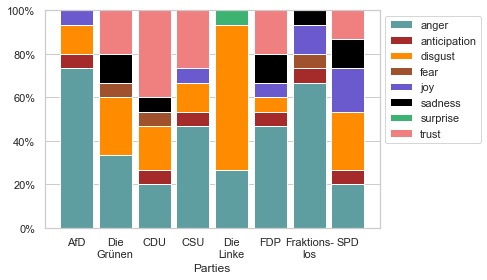

In [21]:
df_non_emotion_overview = df_non_covid_emotion.copy()
df_non_emotion_overview = df_non_emotion_overview.groupby('emotion').count()
df_non_emotion_overview = df_non_emotion_overview.drop(['name'], axis='columns')
df_non_emotion_overview = df_non_emotion_overview.rename(columns={'party': 'count'})
print("Number of non-COVID-tweets by emotion")
print(df_non_emotion_overview)

df_non_emotion_per_party = df_non_covid_emotion.copy()
df_non_emotion_per_party = df_non_emotion_per_party.groupby(['emotion', 'party']).count()
df_non_emotion_per_party = df_non_emotion_per_party.rename(columns={'name': 'count'})
print("Number of non-COVID-tweets by emotion and party")
print(df_non_emotion_per_party)

# Stacked bar chart
fig, ax = plt.subplots()
r = [0,1,2,3,4,5,6,7]

df_covid_emotion_stacked = df_non_covid_emotion.copy()
stacked = (df_covid_emotion_stacked['emotion'].value_counts(sort= True, ascending=False)).index.to_list()
df = df_covid_emotion_stacked.groupby(['party'])['emotion'].value_counts(sort=True, ascending=False).unstack().fillna(0)

# From raw value to percentage
totals = [i+j+k+l+m+n+o+p for i,j,k,l,m,n,o,p in zip(df['anger'], df['anticipation'], df['disgust'], df['fear'], df['joy'], df['sadness'], df['surprise'], df['trust'])]
anger = [i / j * 100 for i,j in zip(df['anger'], totals)]
anticipation = [i / j * 100 for i,j in zip(df['anticipation'], totals)]
disgust = [i / j * 100 for i,j in zip(df['disgust'], totals)]
fear = [i / j * 100 for i,j in zip(df['fear'], totals)]
joy = [i / j * 100 for i,j in zip(df['joy'], totals)]
sadness = [i / j * 100 for i,j in zip(df['sadness'], totals)]
surprise = [i / j * 100 for i,j in zip(df['surprise'], totals)]
trust = [i / j * 100 for i,j in zip(df['trust'], totals)]

# plot
barWidth = 0.85
names = ('AfD','Die\nGrünen','CDU','CSU','Die\nLinke', 'FDP', 'Fraktions-\nlos', 'SPD')
plt.bar(r, anger, width=barWidth, color='cadetblue', label='anger')
plt.bar(r, anticipation, bottom=anger, width=barWidth, color='brown', label='anticipation')
plt.bar(r, disgust, bottom=[i+j for i,j in zip(anger, anticipation)], width=barWidth, color='darkorange', label='disgust')
plt.bar(r, fear, bottom=[i+j+k for i,j,k in zip(anger, anticipation, disgust)], width=barWidth, color='sienna', label='fear')
plt.bar(r, joy, bottom=[i+j+k+l for i,j,k,l in zip(anger, anticipation, disgust, fear)], width=barWidth, color='slateblue', label='joy')
plt.bar(r, sadness, bottom=[i+j+k+l+m for i,j,k,l,m in zip(anger, anticipation, disgust, fear, joy)], width=barWidth, color='black', label='sadness')
plt.bar(r, surprise, bottom=[i+j+k+l+m+n for i,j,k,l,m,n in zip(anger, anticipation, disgust, fear, joy, sadness)],  color='mediumseagreen', width=barWidth, label='surprise')
plt.bar(r, trust, bottom=[i+j+k+l+m+n+o for i,j,k,l,m,n,o in zip(anger, anticipation, disgust, fear, joy, sadness, surprise)],  color='lightcoral', width=barWidth, label='trust')


colors = ['darkcyan', 'sienna', 'khaki', 'darkgreen', 'slateblue', 'lightcoral']
plt.gca().set_prop_cycle(cycler('color', colors))
plt.xticks(r, names)
plt.xlabel("Parties")
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
plt.gca().set_yticklabels(['{:.0f}%'.format(x) for x in plt.gca().get_yticks()])
vals = ax.get_yticks()
plt.show()

